In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Diabetes Dataset Exploration

In [2]:
df_diabetes = pd.read_csv("/Users/manuelrodriguezsutil/Developer/health-risk/kaggle-datasets/diabetes.csv")

In [3]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
invalid_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df_diabetes[invalid_zero_cols] = df_diabetes[invalid_zero_cols].replace(0, np.nan)

In [6]:
df_diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

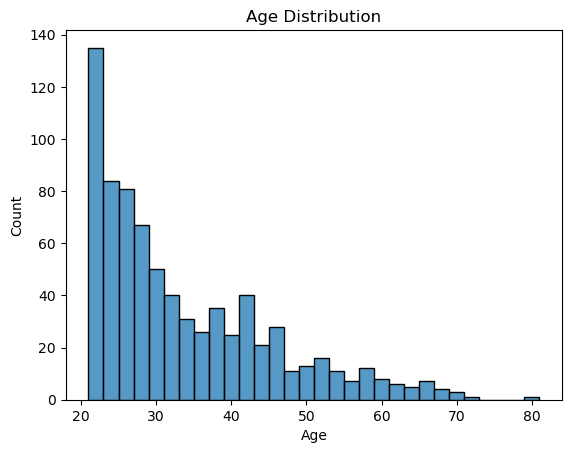

In [7]:
sns.histplot(df_diabetes["Age"], bins=30)
plt.title("Age Distribution")
plt.savefig("/Users/manuelrodriguezsutil/Developer/health-risk/visuals/diabetes/age_distribution.png", dpi=300)
plt.show()

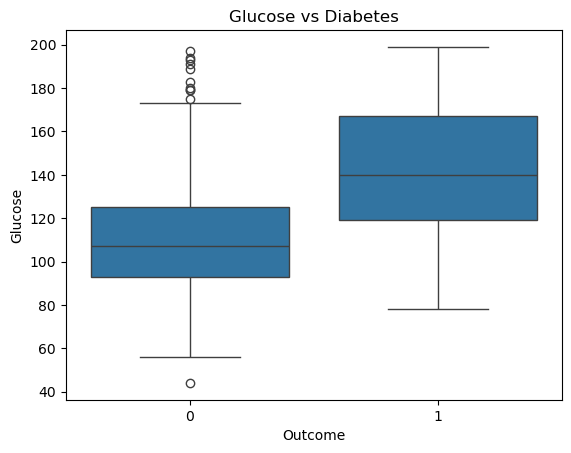

In [8]:
sns.boxplot(x="Outcome", y="Glucose", data=df_diabetes)
plt.title("Glucose vs Diabetes")
plt.savefig("/Users/manuelrodriguezsutil/Developer/health-risk/visuals/diabetes/glucose_vs_diabetes.png", dpi=300)
plt.show()

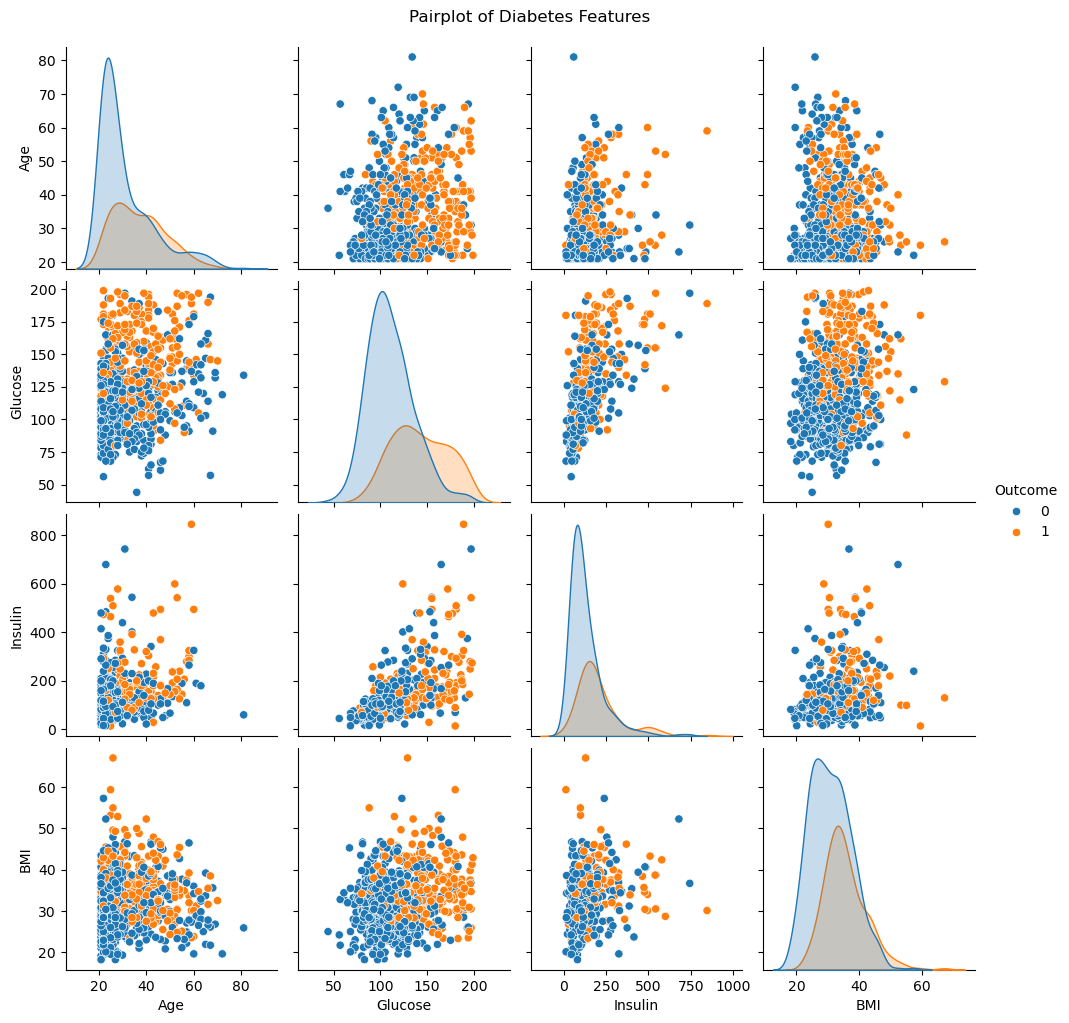

In [9]:
g = sns.pairplot(df_diabetes[["Age", "Glucose", "Insulin", "BMI", "Outcome"]], hue="Outcome")
g.fig.suptitle("Pairplot of Diabetes Features", y=1.02)
g.savefig("/Users/manuelrodriguezsutil/Developer/health-risk/visuals/diabetes/pairplot.png", dpi=300)
plt.show()

In [10]:
missing_counts = df_diabetes.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

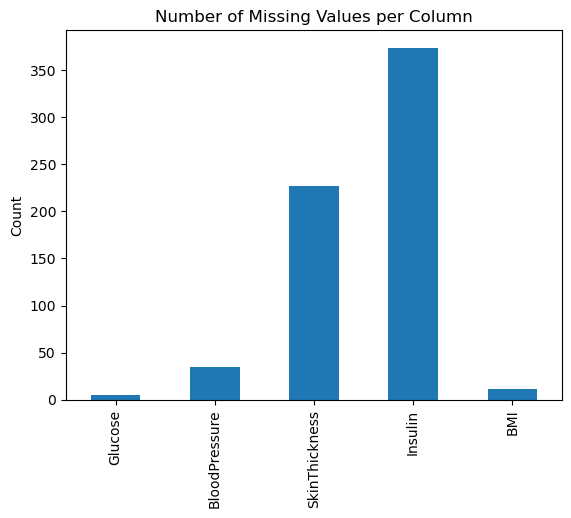

In [11]:
missing_counts.plot(kind="bar")
plt.title("Number of Missing Values per Column")
plt.ylabel("Count")
plt.savefig("/Users/manuelrodriguezsutil/Developer/health-risk/visuals/diabetes/missing_count.png", dpi=300)
plt.show()

In [12]:
missing_percent = df_diabetes.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

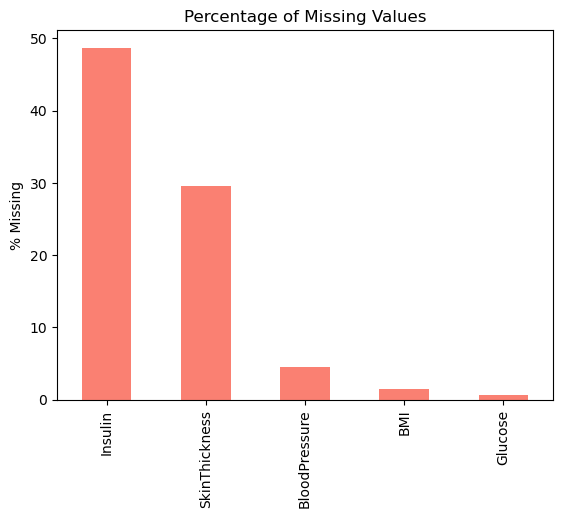

In [13]:
missing_percent.plot(kind="bar", color="salmon")
plt.title("Percentage of Missing Values")
plt.ylabel("% Missing")
plt.savefig("/Users/manuelrodriguezsutil/Developer/health-risk/visuals/diabetes/missing_percent.png", dpi=300)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
diabetes_features = ["Pregnancies",
                     "Glucose",
                     "BloodPressure",
                     "SkinThickness",
                     "Insulin",
                     "BMI",
                     "DiabetesPedigreeFunction",
                     "Age"]

In [16]:
bounds = {
    "Glucose": (50, 250),
    "BloodPressure": (40, 140),
    "SkinThickness": (5, 60),
    "Insulin": (15, 500),
    "BMI": (10, 60),
}

In [17]:
for col, (low, high) in bounds.items():
    df_diabetes.loc[(df_diabetes[col] < low) | (df_diabetes[col] > high), col] = np.nan

In [18]:
df_diabetes.fillna(df_diabetes.median(numeric_only=True), inplace=True)

In [19]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.751302,72.602865,28.972656,133.50651,32.409896,0.471876,33.240885,0.348958
std,3.369578,30.309174,11.704860,8.330715,67.87159,6.760263,0.331329,11.760232,0.476951
min,0.000000,56.000000,40.000000,7.000000,15.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,122.00000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,122.00000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,122.00000,36.525000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,495.00000,59.400000,2.420000,81.000000,1.000000


In [20]:
X_diabetes_scaled = StandardScaler().fit_transform(df_diabetes[diabetes_features])

In [21]:
pca_diabetes = PCA()
X_pca_diabetes = pca_diabetes.fit_transform(X_diabetes_scaled)

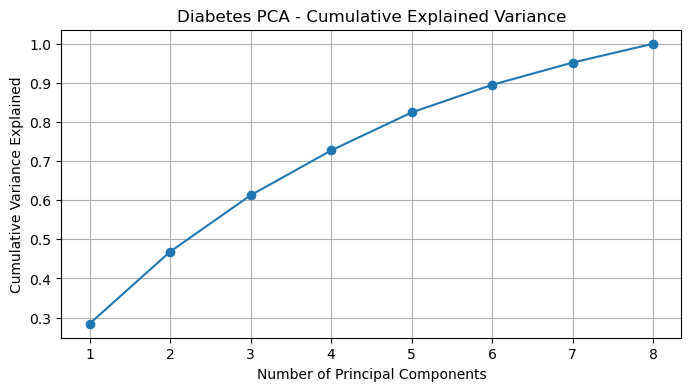

In [22]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca_diabetes.explained_variance_ratio_) + 1),
         pca_diabetes.explained_variance_ratio_.cumsum(),
         marker='o')
plt.title('Diabetes PCA - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.savefig("/Users/manuelrodriguezsutil/Developer/health-risk/visuals/diabetes/pca_diabetes.png", dpi=300)
plt.show()

In [23]:
loadings_diabetes = pd.DataFrame(
    pca_diabetes.components_,
    columns=diabetes_features,
    index=[f'PC{i+1}' for i in range(len(diabetes_features))]
)

print("Top contributors to PC1:")
print(loadings_diabetes.loc['PC1'].sort_values(ascending=False))

print("\nTop contributors to PC2:")
print(loadings_diabetes.loc['PC2'].sort_values(ascending=False))

Top contributors to PC1:
Glucose                     0.411955
BMI                         0.406651
SkinThickness               0.393975
Age                         0.388175
BloodPressure               0.382920
Pregnancies                 0.318309
Insulin                     0.299441
DiabetesPedigreeFunction    0.146350
Name: PC1, dtype: float64

Top contributors to PC2:
Pregnancies                 0.544070
Age                         0.525422
BloodPressure               0.143030
Glucose                    -0.068926
Insulin                    -0.214903
DiabetesPedigreeFunction   -0.269084
SkinThickness              -0.324194
BMI                        -0.423107
Name: PC2, dtype: float64


In [24]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.751302,72.602865,28.972656,133.50651,32.409896,0.471876,33.240885,0.348958
std,3.369578,30.309174,11.704860,8.330715,67.87159,6.760263,0.331329,11.760232,0.476951
min,0.000000,56.000000,40.000000,7.000000,15.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,122.00000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,122.00000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,122.00000,36.525000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,495.00000,59.400000,2.420000,81.000000,1.000000


In [25]:
df_diabetes.to_csv("/Users/manuelrodriguezsutil/Developer/health-risk/data/diabetes_cleaned.csv", index=False)